In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from numpy import array, bincount, log
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [2]:
MU = 3.8
N = int(10E4)
INITIAL = 0.5
MIN_SIZE = 2
MAX_SIZE = 26
BITS_RANGE = list(range(MIN_SIZE, MAX_SIZE + 1))

In [3]:
def generate(x, mu, n):
    current = x
    for _ in range(n):
        yield current
        current = mu * current * (1 - current)

In [4]:
def bin_to_dec(sequence, bits):
    aligned_sequence = sequence.flatten()[:sequence.size - sequence.size % bits]
    binary_matrix = aligned_sequence.reshape((sequence.size // bits, bits))
    result_sequence = array([binary_matrix[:,i] * (2**i) for i in range(binary_matrix.shape[1])])
    return result_sequence.sum(axis=0)

In [5]:
def R(probabilities, beta):
    return -log((probabilities[probabilities>0]**beta).sum()) / (beta - 1)

In [6]:
def H(probabilities):
    indices = probabilities>0
    return -(log(probabilities[indices]) * probabilities[indices]).sum()

In [7]:
def show_entropies(entropies):
    for entropy in entropies:
        plt.plot(BITS_RANGE, entropy, '-o')
    plt.show()

In [8]:
source_sequence = array(list(generate(INITIAL, MU, N)))
bin_sequence = (source_sequence > 0.5).astype('i')
sequences = array([bin_to_dec(bin_sequence, bits_count).astype('i') for bits_count in BITS_RANGE])
probabilities = array([bincount(sequence)/sequence.size for sequence in sequences])

In [9]:
shannon_entropies = [H(p) for p in probabilities]
renyi_entropies2 = [R(p, 2) for p in probabilities]
renyi_entropies3 = [R(p, 3) for p in probabilities]

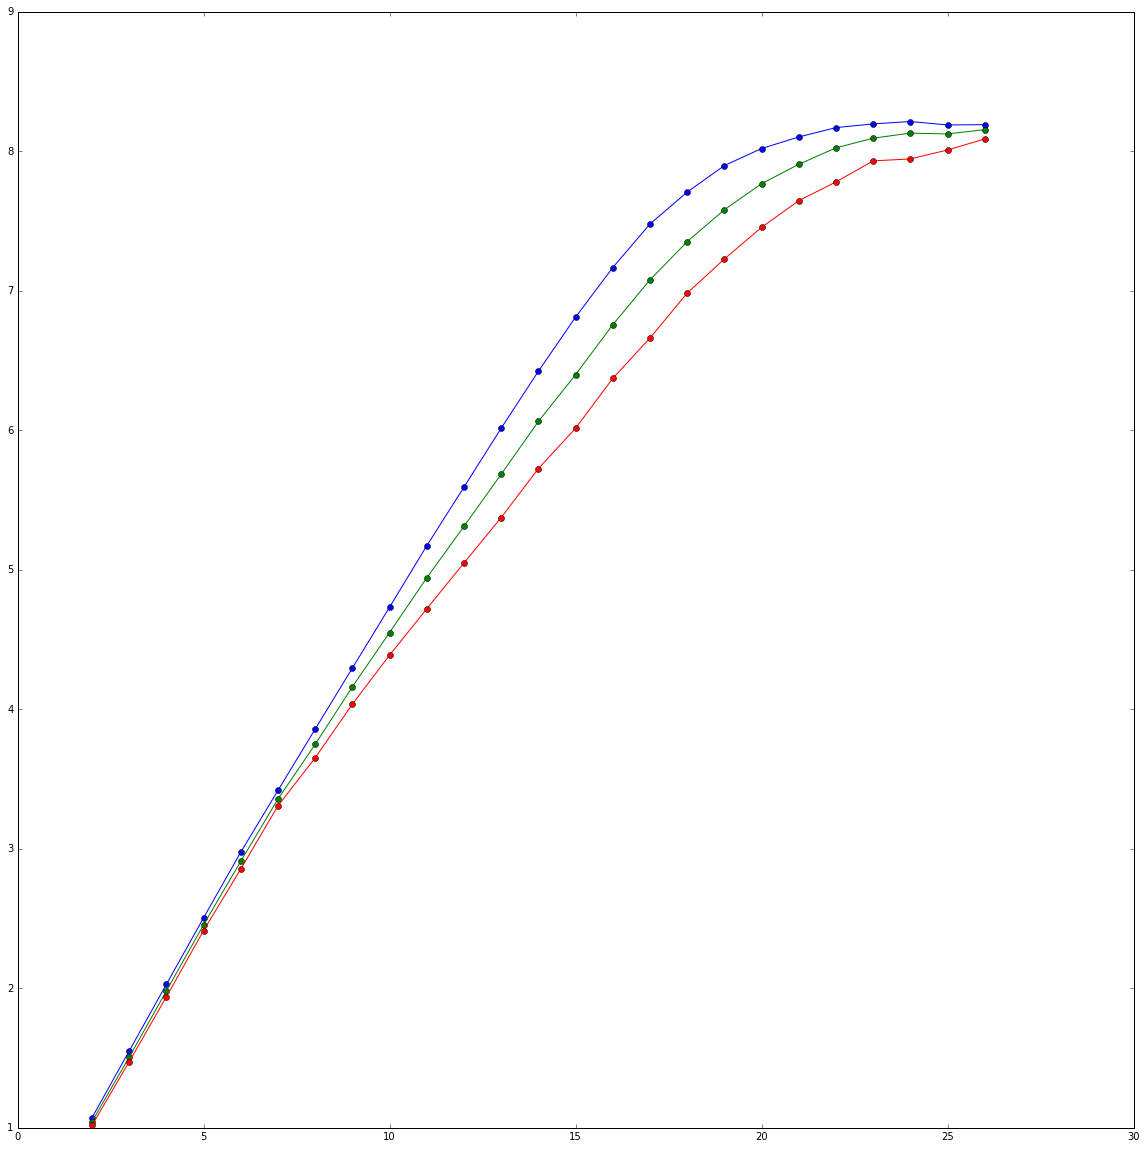

In [10]:
show_entropies([shannon_entropies, renyi_entropies2, renyi_entropies3])

In [11]:
means = array([shannon_entropies, renyi_entropies2, renyi_entropies3]).mean(axis=0)

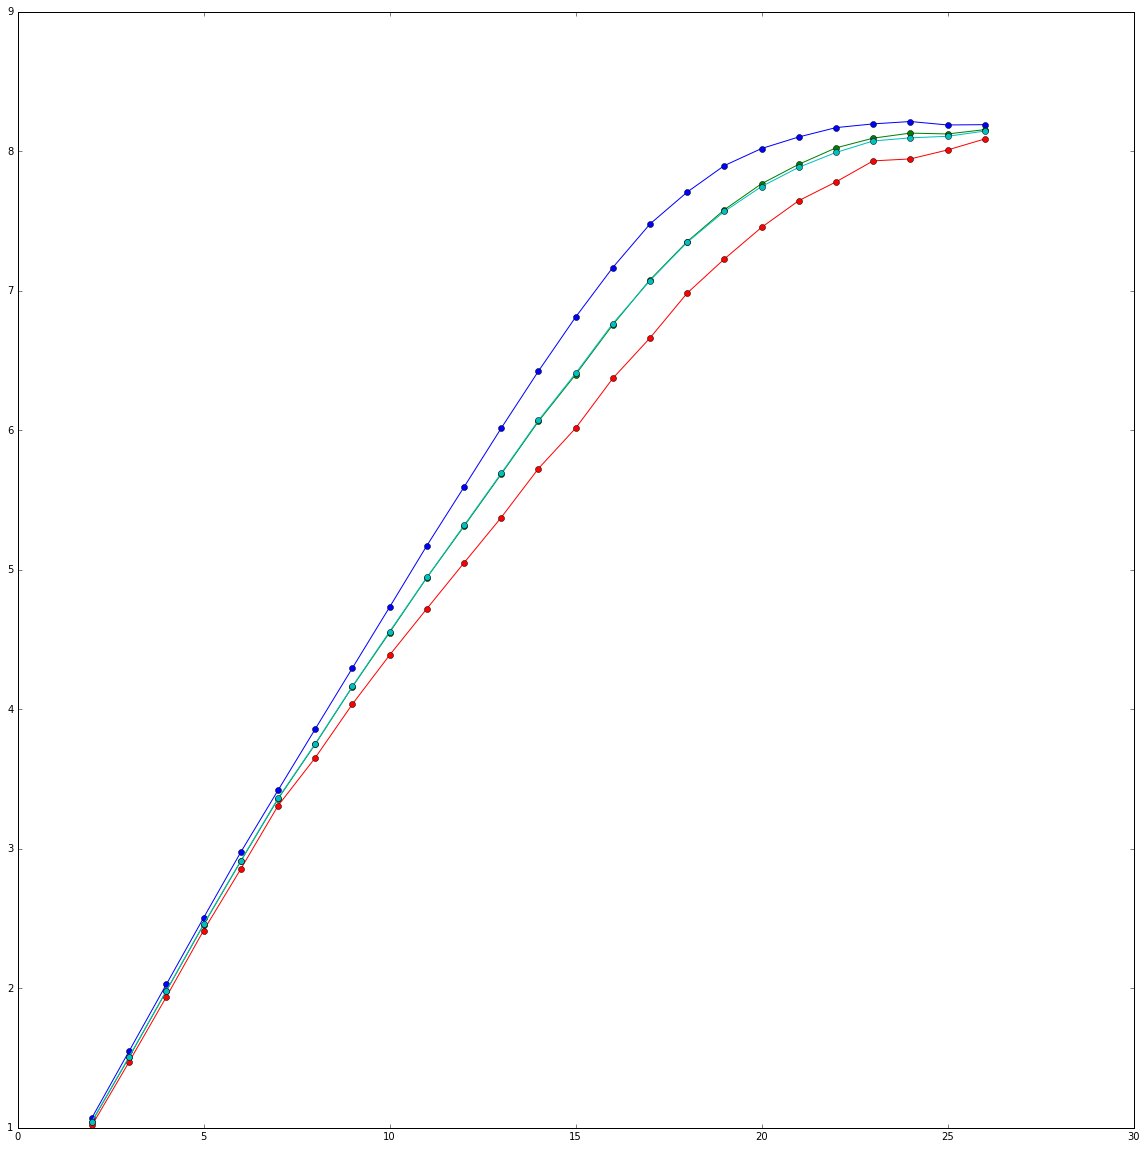

In [12]:
show_entropies([shannon_entropies, renyi_entropies2, renyi_entropies3, means])

In [13]:
shannon_entropies_chaos = [-log(2**(-n)) for n in BITS_RANGE]
renyi_entropies2_chaos = [-log((2**n) * (2**(-2*n))) for n in BITS_RANGE]
renyi_entropies3_chaos = [-log((2**n) * (2**(-3*n)))/2 for n in BITS_RANGE]

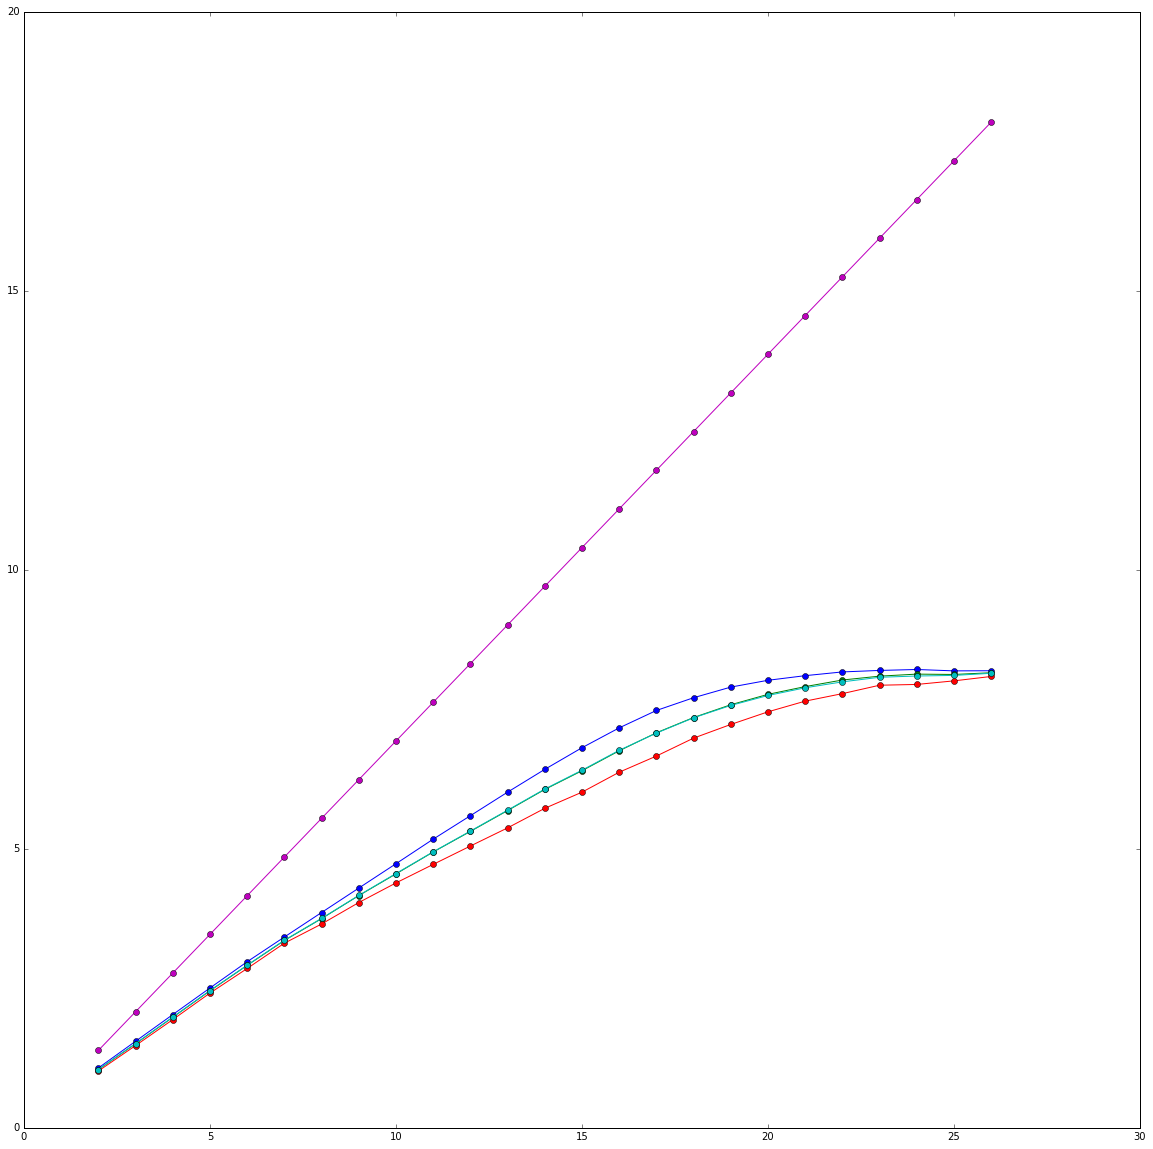

In [14]:
show_entropies([shannon_entropies, renyi_entropies2, renyi_entropies3, means, shannon_entropies_chaos])